In [133]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import zscore
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [134]:
diet = pd.read_csv(r"diet.csv")
examination = pd.read_csv(r"examination.csv")
labs = pd.read_csv(r"labs.csv")
questionnaire = pd.read_csv(r"questionnaire.csv")
demographic = pd.read_csv(r"demographic.csv")

In [64]:
# Count missing values in each column
missing_counts = examination.isnull().sum()

# Identify columns with more than 5000 missing values
examination_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
examination_clean = examination.drop(columns=examination_drop)

# Display the cleaned DataFrame
examination_clean.head()

,SEQN,PEASCST1,PEASCTM1,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC
0,73557,1,620.0,1.0,4.0,86.0,1.0,1.0,140.0,122.0,...,P,P,P,P,P,P,P,P,P,P
1,73558,1,766.0,1.0,4.0,74.0,1.0,1.0,170.0,156.0,...,S,S,S,S,S,S,Z,S,E,E
2,73559,1,665.0,1.0,4.0,68.0,1.0,1.0,160.0,140.0,...,S,Z,S,S,S,S,S,Z,Z,E
3,73560,1,803.0,1.0,2.0,64.0,1.0,1.0,130.0,108.0,...,D,S,S,S,S,U,D,D,S,U
4,73561,1,949.0,1.0,3.0,92.0,1.0,1.0,170.0,136.0,...,S,Z,R,Z,S,Z,E,E,E,E


In [135]:
# Count missing values in each column
missing_counts = demographic.isnull().sum()

# Identify columns with more than 5000 missing values
demographic_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
demographic_clean = demographic.drop(columns=demographic_drop)

# Display the cleaned DataFrame
demographic_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,4,4,1.0,1.0,1,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,3,3,1.0,2.0,1,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,3,3,2.0,1.0,1,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,3,3,1.0,NaN,1,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,3,3,1.0,2.0,1,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [136]:
# Count missing values in each column
missing_counts = diet.isnull().sum()

# Identify columns with more than 5000 missing values
diet_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
diet_clean = diet.drop(columns=diet_drop)

# Display the cleaned DataFrame
diet_clean.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370M,DRD370N,DRD370O,DRD370P,DRD370Q,DRD370R,DRD370S,DRD370T,DRD370U,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [137]:
# Count missing values in each column
missing_counts = questionnaire.isnull().sum()

# Identify columns with more than 5000 missing values
questionnaire_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
questionnaire_clean = questionnaire.drop(columns=questionnaire_drop)

# Display the cleaned DataFrame
questionnaire_clean.head()

,SEQN,ACD011A,ALQ101,BPQ020,BPQ056,BPQ059,BPQ080,CBD070,CBD090,CBD110,...,SMDANY,SMAQUEX.y,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD140,WHQ150
0,73557,1.0,1.0,1.0,2.0,2.0,1.0,300.0,0.0,50.0,...,1.0,2.0,69.0,180.0,3.0,3.0,210.0,NaN,270.0,62.0
1,73558,1.0,1.0,1.0,1.0,2.0,1.0,642.0,214.0,128.0,...,1.0,2.0,71.0,200.0,3.0,3.0,160.0,2.0,250.0,25.0
2,73559,1.0,1.0,1.0,2.0,2.0,1.0,150.0,25.0,0.0,...,2.0,2.0,70.0,195.0,3.0,2.0,195.0,2.0,228.0,35.0
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,400.0,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1.0,1.0,1.0,1.0,2.0,2.0,200.0,0.0,40.0,...,2.0,2.0,67.0,120.0,2.0,1.0,150.0,2.0,170.0,60.0


In [138]:
# Count missing values in each column
missing_counts = labs.isnull().sum()

# Identify columns with more than 5000 missing values
labs_drop = missing_counts[missing_counts > 5000].index

# Drop those columns
labs_clean = labs.drop(columns=labs_drop)

# Display the cleaned DataFrame
labs_clean.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,...,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,...,204.73,2.60,0.0,8.15,148.33,0.0,90.0,1.636,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,3.7,37.0,99.0,22.0,...,209.64,2.66,0.0,9.57,174.17,0.0,66.0,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,169.82,2.16,0.0,13.07,237.87,0.0,61.0,0.575,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1


In [139]:
common_id = "SEQN"

if common_id in diet_clean.columns and common_id in labs_clean.columns and common_id in questionnaire_clean.columns and common_id in examination_clean.columns:
    # Merge all three datasets on the common identifier
    merged_df = diet_clean.merge(labs_clean, on=common_id, how='outer').merge(questionnaire_clean, on=common_id, how='outer').merge(examination_clean, on=common_id, how='outer').merge(demographic_clean, on=common_id, how="outer")
print(f"Merged Data duplicates: {merged_df.duplicated().sum()}")

Merged Data duplicates: 0


In [140]:
merged_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,16888.327864,12930.890649,1.0,49.0,2.0,2.0,6.0,2.0,1.0,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,17932.143865,12684.148869,1.0,59.0,2.0,2.0,4.0,1.0,1.0,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,59641.812930,39394.236709,1.0,49.0,2.0,2.0,18.0,6.0,1.0,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,142203.069917,125966.366442,1.0,54.0,2.0,2.0,21.0,3.0,1.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,59052.357033,39004.892993,1.0,63.0,2.0,2.0,18.0,1.0,1.0,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [141]:
merged_df.dropna()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
5005,78562,24965.483639,20006.006220,1.0,25.0,2.0,2.0,13.0,3.0,1.0,...,3.0,1.0,4.0,13999.524327,14215.949711,2,106,7.0,7.0,1.82
6980,80537,6441.279569,19985.146199,1.0,25.0,2.0,2.0,25.0,6.0,1.0,...,2.0,1.0,1.0,7980.500827,8100.560547,1,114,7.0,7.0,1.70
7680,81237,24353.403744,0.000000,1.0,25.0,2.0,1.0,16.0,4.0,1.0,...,4.0,1.0,5.0,14948.678988,15344.891998,2,107,7.0,7.0,1.07
9061,82618,62588.320892,44271.314440,1.0,22.0,2.0,2.0,27.0,6.0,1.0,...,4.0,1.0,5.0,100857.701196,102416.908937,2,113,7.0,7.0,1.92


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection function using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and display outliers for each numerical column
print("\nOutlier Detection in Numerical Columns:")
for column in merged_df.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers(merged_df, column)
    print(f"{column}: {len(outliers)} outliers")


Outlier Detection in Numerical Columns:
SEQN: 0 outliers
WTDRD1: 671 outliers
WTDR2D: 662 outliers
DR1DRSTZ: 1282 outliers
DR1EXMER: 0 outliers
DRABF: 134 outliers
DRDINT: 1087 outliers
DR1DBIH: 137 outliers
DR1DAY: 0 outliers
DR1LANG: 935 outliers
DR1MNRSP: 1951 outliers
DR1HELPD: 1281 outliers
DBQ095Z: 126 outliers
DBD100: 8 outliers
DRQSPREP: 705 outliers
DR1STY: 1510 outliers
DRQSDIET: 1079 outliers
DR1TNUMF: 97 outliers
DR1TKCAL: 274 outliers
DR1TPROT: 298 outliers
DR1TCARB: 277 outliers
DR1TSUGR: 346 outliers
DR1TFIBE: 319 outliers
DR1TTFAT: 297 outliers
DR1TSFAT: 317 outliers
DR1TMFAT: 332 outliers
DR1TPFAT: 360 outliers
DR1TCHOL: 397 outliers
DR1TATOC: 471 outliers
DR1TATOA: 1639 outliers
DR1TRET: 299 outliers
DR1TVARA: 382 outliers
DR1TACAR: 1452 outliers
DR1TBCAR: 995 outliers
DR1TCRYP: 770 outliers
DR1TLYCO: 884 outliers
DR1TLZ: 828 outliers
DR1TVB1: 322 outliers
DR1TVB2: 354 outliers
DR1TNIAC: 370 outliers
DR1TVB6: 424 outliers
DR1TFOLA: 361 outliers
DR1TFA: 480 outliers
D

In [ ]:
# LABS dataset variables
# merged_df['LBXSGL'] Glucose, refrigerated serum (mg/dL)
# merged_df['LBDHDD'] Direct HDL-Cholesterol (mg/dL)
# merged_df['LBXTC'] Total Cholesterol( mg/dL)
# merged_df['LBXSTR'] Triglycerides, refrigerated (mg/dL)
# merged_df['LBXSASSI'] Aspartate aminotransferase AST (U/L)
# merged_df['LBXSATSI'] Alanine aminotransferase ALT (U/L)	

# EXAMINATION dataset variables
# merged_df['BMXBMI'] Body Mass Index (kg/m**2)
# merged_df['BMXWAIST'] Waist Circumference (cm)
# merged_df['BPXSY1'] Systolic: Blood pressure (first reading) mm Hg - take together 1-3 and make average
# merged_df['BPXDI1'] Diastolic: Blood pressure (first reading) mm Hg - take together 1-3 and make average

# DIET dataset variables
# merged_df['DR1TKCAL'] Energy (kcal)
# merged_df['DR1TCARB'] Carbohydrate (gm)
# merged_df['DR1TTFAT'] Total fat (gm)
# merged_df['DR1TSFAT'] Total saturated fatty acids (gm)
# merged_df['DR1TMFAT'] Total monounsaturated fatty acids (gm)
# merged_df['DR1TPROT'] Protein (gm)
# merged_df['DR1TSODI'] Sodium (mg)
# merged_df['DR1TPOTA'] Potassium (mg)
# merged_df['DR1TFIBE'] Dietary fiber (gm)

# QUESTIONNAIRE dataset variables
# merged_df['SMD460'] How many people who live here smoke cigarettes, cigars, little cigars, pipes, water pipes, hookah, or any other tobacco product?
# merged_df['SMDANY'] Used any tobacco product last 5 days?
# merged_df['ALQ101'] Included are liquor (such as whiskey or gin), beer, wine, wine coolers, and any other type of alcoholic beverage.In any one year, {have you/has SP} had at least 12 drinks of any type of alcoholic beverage? By a drink, I mean a 12 oz. beer, a 5 oz. glass of wine, or one and half ounces of liquor.

# DEMOGRAPHIC dataset variables
# merged_df['DMDHRAGE'] HH reference person's age in years
# merged_df['DMDHRGND'] # HH reference person's gender
# merged_df['DMDHRMAR'] HH reference person's marital status

0        1
1        1
2        1
3        1
4        1
        ..
10170    2
10171    1
10172    2
10173    2
10174    1
Name: DMDHRGND, Length: 10175, dtype: int64

In [ ]:
# Combine blood pressure readings into averages
merged_df['BPXSY_avg'] = merged_df[['BPXSY1', 'BPXSY2', 'BPXSY3']].mean(axis=1)
merged_df['BPXDI_avg'] = merged_df[['BPXDI1', 'BPXDI2', 'BPXDI3']].mean(axis=1)

# Drop original BP columns for simplicity
merged_df.drop(columns=['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXDI1', 'BPXDI2', 'BPXDI3'], inplace=True)

# Handle missing data (example: impute mean for glucose, mode for gender)
merged_df['LBXSGL'] = merged_df['LBXSGL'].fillna(merged_df['LBXSGL'].mean())
merged_df['DMDHRGND'] = merged_df['DMDHRGND'].dropna()
merged_df['BMXBMI'] = merged_df['BMXBMI'].fillna(merged_df['BMXBMI'].mean())
merged_df['BPXSY_avg'] = merged_df['BPXSY_avg'].fillna(merged_df['BPXSY_avg'].mean())
merged_df['LBXSTR'] = merged_df['LBXSTR'].fillna(merged_df['LBXSTR'].mean())

In [148]:
# Normalize continuous variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
continuous_vars = ['LBXSGL', 'LBDHDD', 'LBXTC', 'LBXSTR', 'BMXBMI', 'BMXWAIST', 'BPXSY_avg', 'BPXDI_avg']
merged_df[continuous_vars] = scaler.fit_transform(merged_df[continuous_vars])

# Encode categorical variables
merged_df = pd.get_dummies(merged_df, columns=['DMDHRGND', 'DMDHRMAR'], drop_first=True)

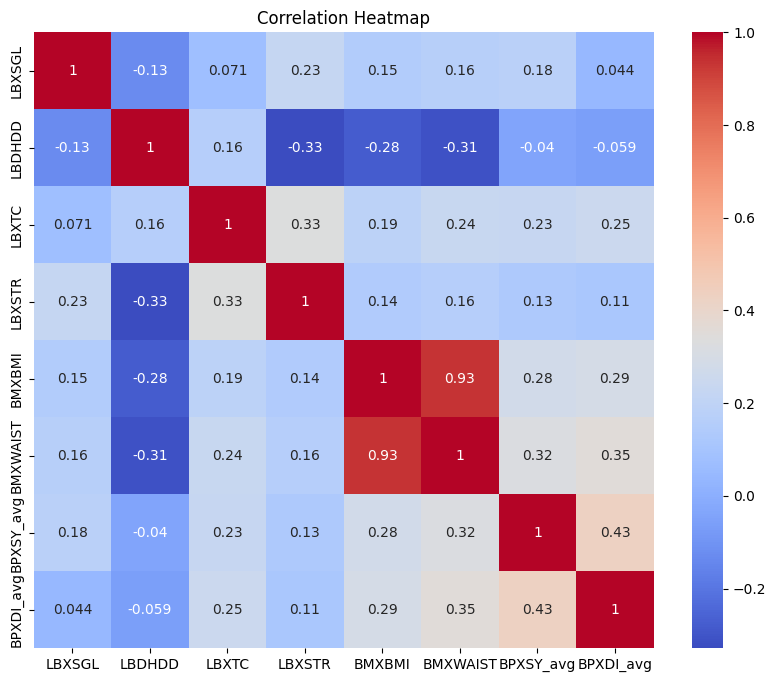

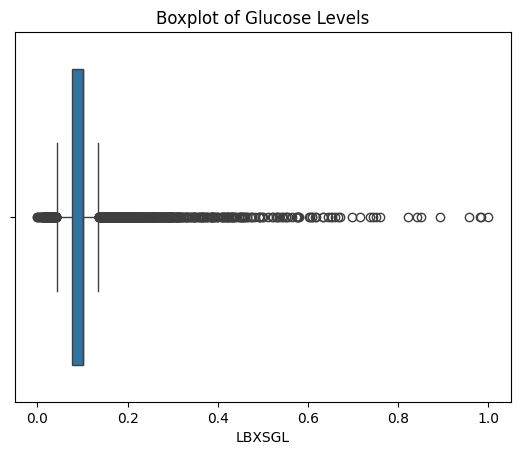

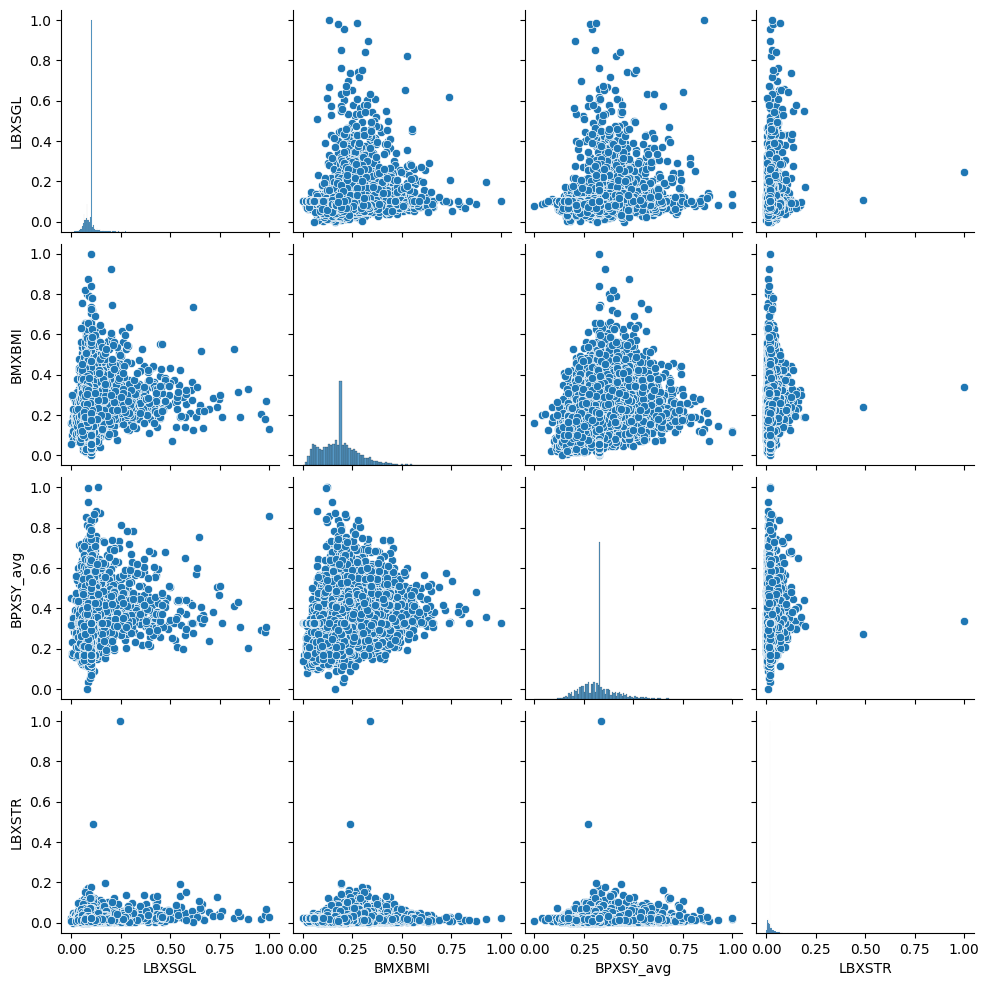

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplots for key variables
sns.boxplot(x=merged_df['LBXSGL'])
plt.title('Boxplot of Glucose Levels')
plt.show()

# Pairplot
sns.pairplot(merged_df, vars=['LBXSGL', 'BMXBMI', 'BPXSY_avg', 'LBXSTR'])
plt.show()

In [154]:
# Check for missing values
print(clustering_features.isnull().sum())

# Impute missing values with column mean
clustering_features.fillna(clustering_features.mean(), inplace=True)


LBXSGL       0
BMXBMI       0
BPXSY_avg    0
LBXSTR       0
dtype: int64


C:\Users\patry\AppData\Local\Temp\ipykernel_6552\784004032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.fillna(clustering_features.mean(), inplace=True)


Silhouette Score: 0.22634877209275414


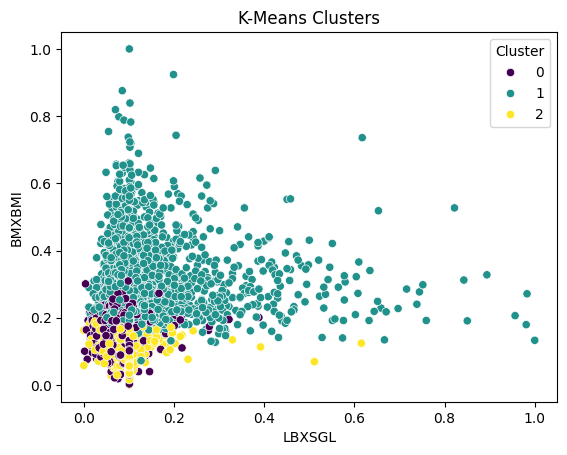

In [155]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_features)
merged_df['Cluster'] = clusters

# Evaluate clustering
silhouette_avg = silhouette_score(clustering_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Scatterplot of clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='LBXSGL', y='BMXBMI', hue='Cluster', data=merged_df, palette='viridis')
plt.title('K-Means Clusters')
plt.show()

C:\Users\patry\AppData\Local\Temp\ipykernel_6552\3021220943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features.fillna(clustering_features.mean(), inplace=True)


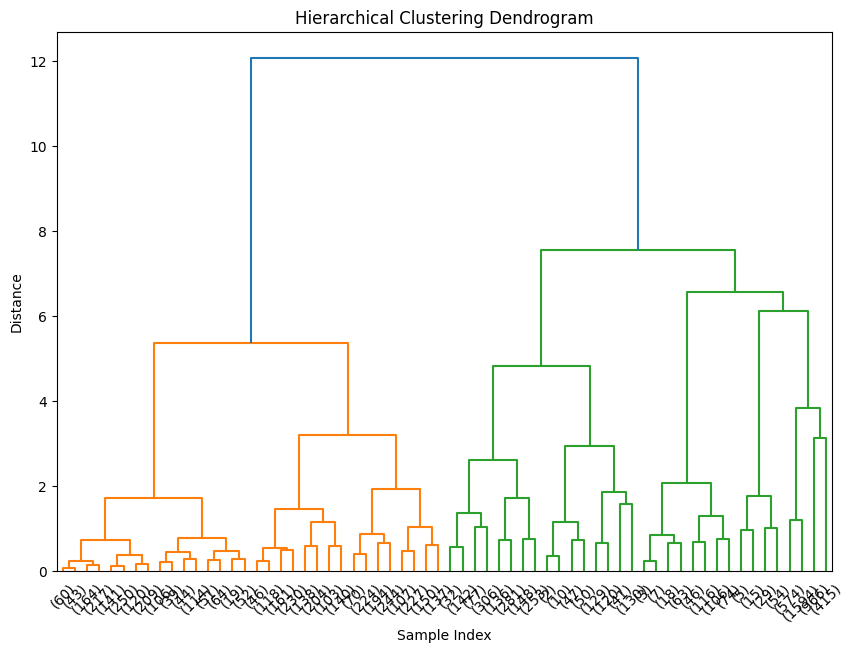

In [157]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure missing values are handled
clustering_features.fillna(clustering_features.mean(), inplace=True)

# Normalization (if not already done)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Perform hierarchical clustering
linkage_matrix = linkage(clustering_features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Assign clusters based on a distance threshold
num_clusters = 3  # Adjust based on the dendrogram
hierarchical_clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to the dataframe
merged_df['Hierarchical_Cluster'] = hierarchical_clusters


In [162]:
from mlxtend.frequent_patterns import apriori, association_rules

# Discretize continuous variables
merged_df['glucose_bin'] = pd.cut(merged_df['LBXSGL'], bins=[0, 0.5, 0.8, 1], labels=['Low', 'Normal', 'High'])
merged_df['hdl_bin'] = pd.cut(merged_df['LBDHDD'], bins=[0, 0.4, 0.6, 1], labels=['Low', 'Normal', 'High'])

# Create binary dataframe for Apriori
binary_data = pd.get_dummies(merged_df[['glucose_bin', 'hdl_bin']], drop_first=True)

# Generate frequent itemsets
frequent_itemsets = apriori(binary_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.01)

# Display rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
